# __Food & Beverages__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Food & Beverages is divided into _three_ subcategories: 

# __2. Food:__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Food & Beverages/food refresh.csv")
df.head()

,text,sentiment
0,as soon as we step out of bangalore airport bu...,Negative
1,when i traveled for bangalore airport from my...,Negative
2,bangalore airport you seem to have forgotten ...,Negative
3,airlines will charge 500 bucks for some crapp...,Negative
4,try the food court at bangalore airport cost...,Negative


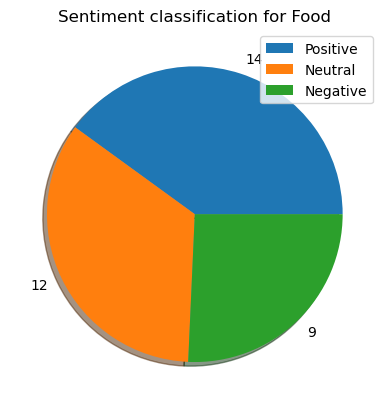

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
food_count = val.values

#Plotting a pie chart
plt.pie(food_count, labels = food_count, shadow= True)
plt.title("Sentiment classification for Food")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding food:

### Topic Modelling

In [5]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = []
#custom = ["carry","prozpekt","baggage","sparrow","fog","pongal","yrs","swiggy","kiosk","mall"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 5
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 7
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: like, india, mind, sparrows, long, outside, best
Topic 2: long, sparrows, mind, worldsparrowday, didn, today, seeing
Topic 3: outside, india, time, long, best, mind, sparrows
Topic 4: sparrows, mind, long, india, like, best, outside
Topic 5: best, sparrows, long, outside, mind, india, like


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

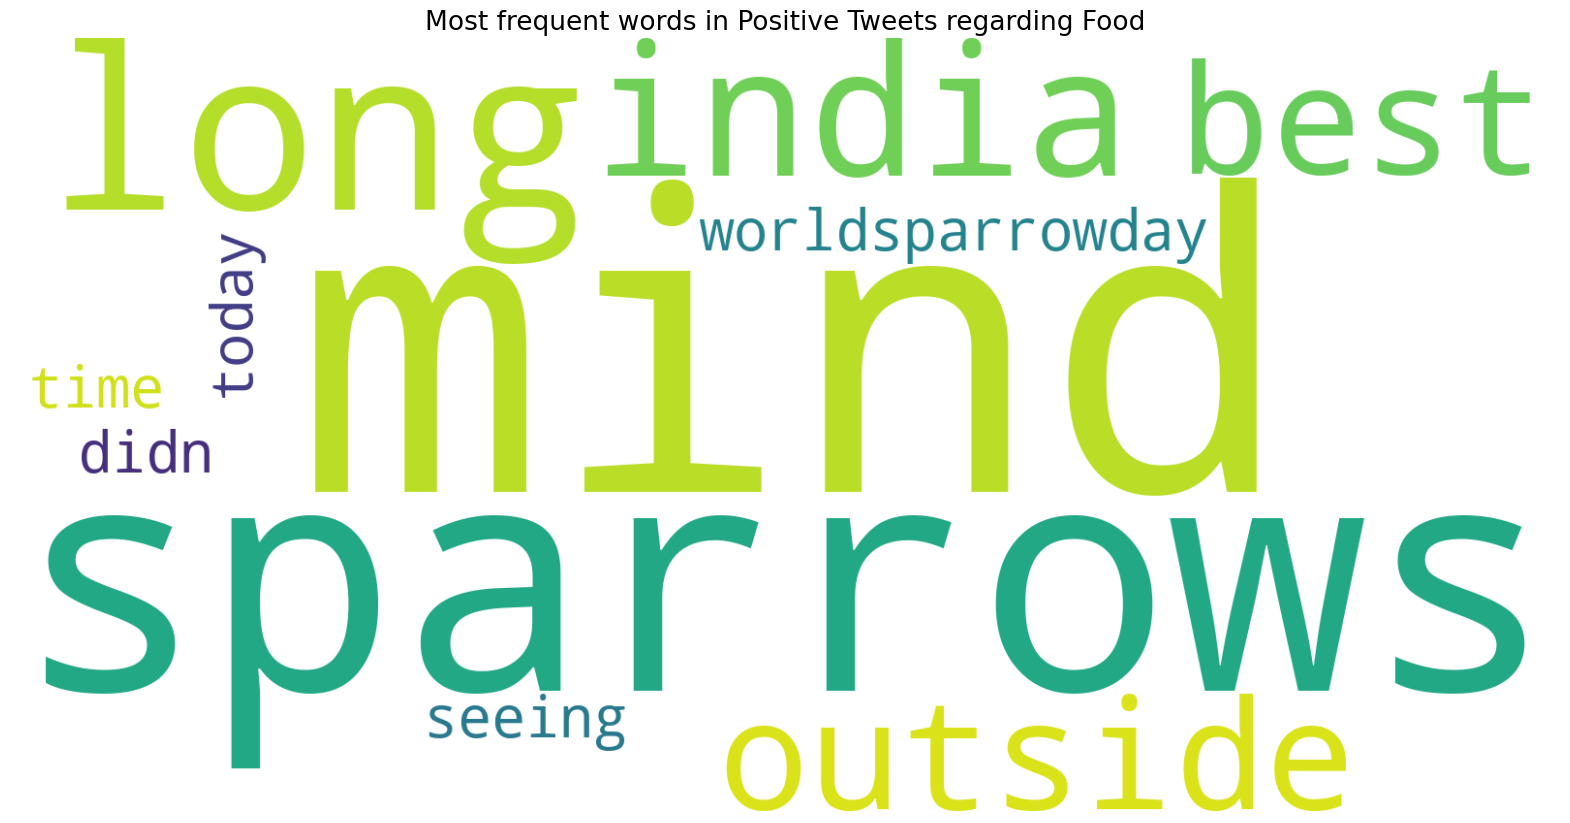

In [6]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Food', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding food
#### 1. Quality of food is praised for being consistently good thorughout the year
#### 2. Specialized kiosk for SSelf ordering has made the process of ordering/collecting food easier
#### 3. Travellers have again mentioned the liveliness sparrows bring to the food court
#### 4. Bangalore airport food court provides quite decent food for a great price

## b.Topic modelling and wordcloud for negative tweets regarding Food:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = ["liqour","sucks","500"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 1,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 5
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 7
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: pump, mysore, traveled, finding, petrol, difficult, try
Topic 2: sparrow, rt, invasion, close, dangerous, sachinkalbag, normal
Topic 3: quite, lounge, crappy, jet, airlines, decent, better
Topic 4: looks, depart, kempegowda_air, passengers, pathetic, people, interested
Topic 5: liquor, sparrows, air, construction, mess, road, soon


### Word Cloud

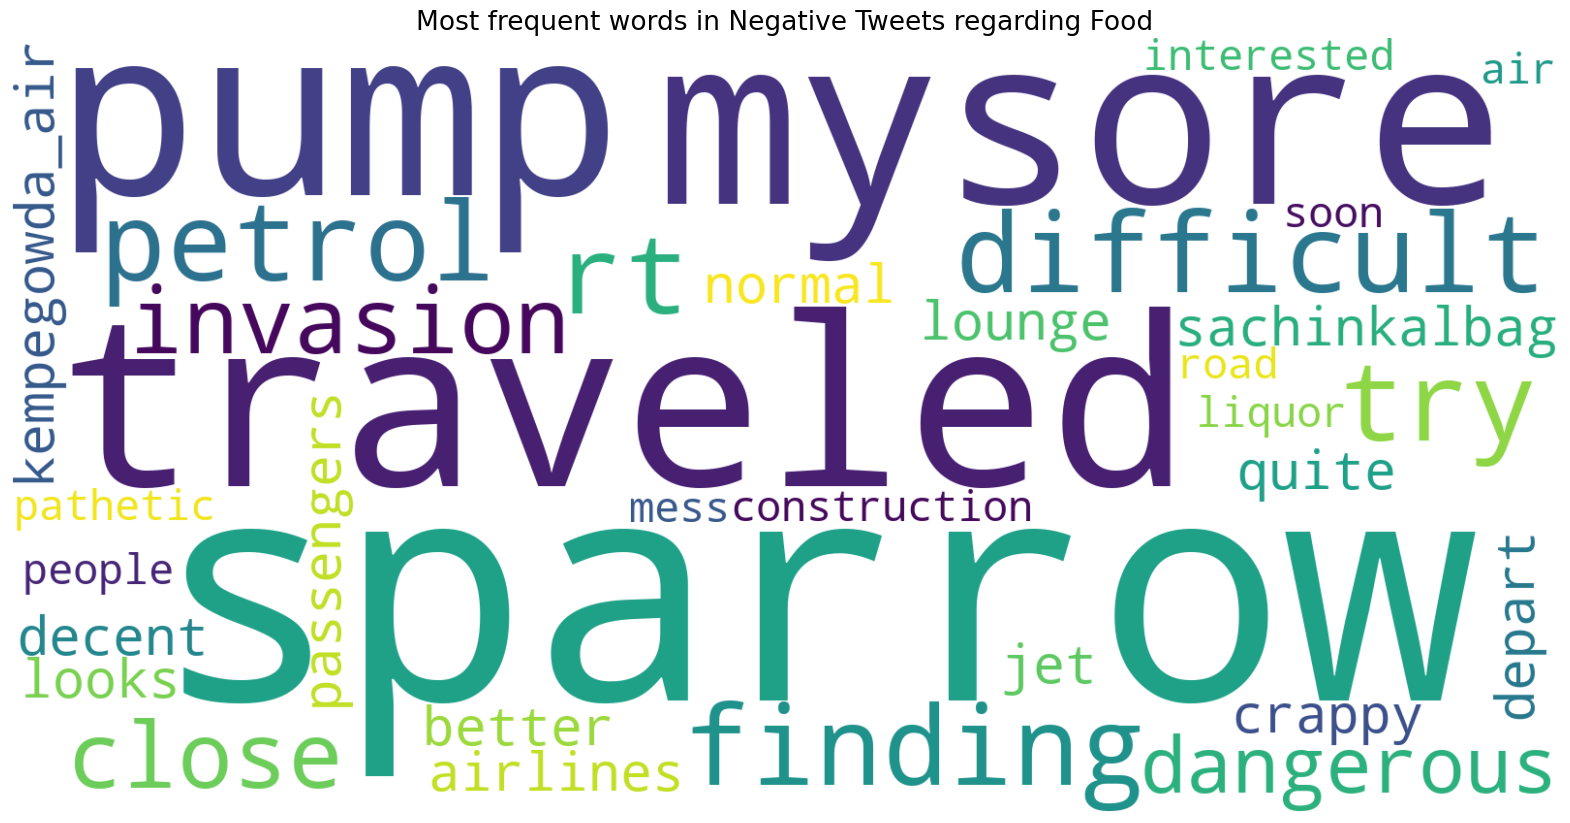

In [9]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Food', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding food
#### 1. Lack of authentic South Indian restaurants is pointed out by many people
#### 2. The number of sparrows can sometimes raise concerns about food hygiene
#### 3. Construction in nearby places is often noisy and disturbing